In [2]:
import numpy as np
import seaborn as sns
from numpy import array
from pandas import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
test =  pd.read_csv('C:\\Users\\Ing\\Desktop\\project2.csv')
train = pd.read_csv('C:\\Users\\Ing\\Desktop\\project1.csv')

In [10]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
def bar_plot(variable):
    var =  train[variable]
    vari = var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(vari.index,vari)
    plt.xticks(vari.index,vari.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,vari))

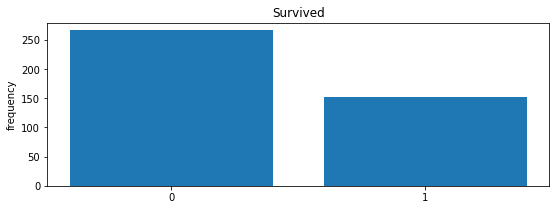

Survived: 
 0    266
1    152
Name: Survived, dtype: int64


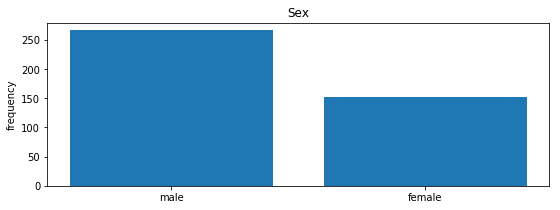

Sex: 
 male      266
female    152
Name: Sex, dtype: int64


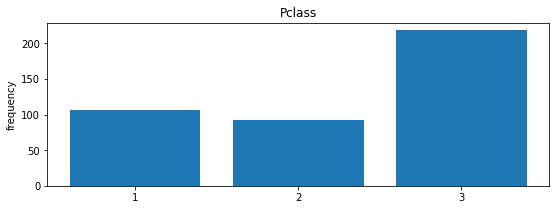

Pclass: 
 3    218
1    107
2     93
Name: Pclass, dtype: int64


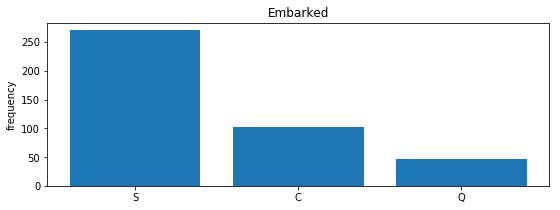

Embarked: 
 S    270
C    102
Q     46
Name: Embarked, dtype: int64


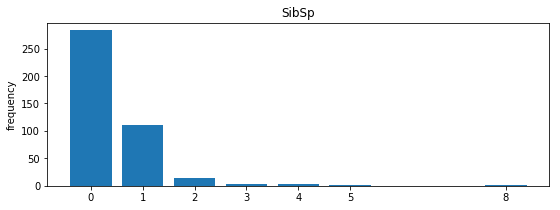

SibSp: 
 0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


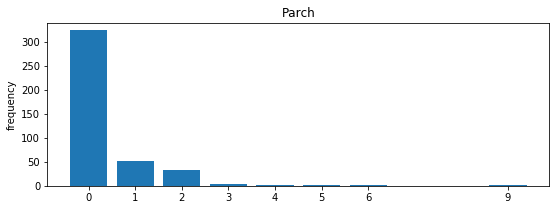

Parch: 
 0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


In [14]:
# data structure of index
column1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in column1:
    bar_plot(c)

In [15]:
# Crosstab of surival people from Pclass
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


In [24]:
pd.crosstab(train.Sex,train.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,0,152,152
male,266,0,266
All,266,152,418


In [26]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')


,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,146,266
All,,107,93,218,418


In [27]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [28]:
#age
df = pd.concat((train, test))
df['Agroup'] = 0
df.loc[df['Age'] < 1, 'Agroup'] = 1
df.loc[(df['Age'] >= 1) & (df['Age'] < 2), 'Agroup'] = 2
df.loc[(df['Age'] >= 2) & (df['Age'] < 3), 'Agroup'] = 3
df.loc[(df['Age'] >= 3) & (df['Age'] < 7), 'Agroup'] = 4
df.loc[(df['Age'] >= 7) & (df['Age'] < 12), 'Agroup'] = 5
df.loc[(df['Age'] >= 12) & (df['Age'] < 16), 'Agroup'] = 6
df.loc[(df['Age'] >= 16) & (df['Age'] < 25), 'Agroup'] = 7
df.loc[(df['Age'] >= 25) & (df['Age'] < 35), 'Agroup'] = 8
df.loc[(df['Age'] >= 35) & (df['Age'] < 48), 'Agroup'] = 9
df.loc[(df['Age'] >= 48) & (df['Age'] < 50), 'Agroup'] = 10
df.loc[(df['Age'] >= 50) & (df['Age'] < 62), 'Agroup'] = 11
df.loc[df['Age'] >= 62, 'Agroup'] = 12
pd.crosstab(df.Agroup,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Agroup,,,
0,186,77,263
1,3,9,12
2,2,8,10
3,8,4,12
4,9,19,28
5,20,9,29
6,11,13,24
7,183,111,294
8,186,106,292


In [16]:
# Data preparing for machine learning
df = pd.concat((train, test))
dataset1 = df.drop(df.columns[[0, 3, 8,10]], axis=1)
dataset2 = pd.get_dummies(dataset1, columns=['Sex'])
dataset = pd.get_dummies(dataset2, columns=['Embarked'])
X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 0].values

In [31]:
dataset.shape

(1309, 11)

In [32]:
X.shape

(1309, 10)

In [17]:
#missing DATA
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:12])
X[:, 1:12] = imputer.transform(X[:, 1:12])

In [18]:
X1=df['PassengerId']

In [19]:
#split data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,random_state = 0)

In [20]:
#split data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,random_state = 0)

In [22]:
#Simple linear model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = classifier.predict(X_test)

In [29]:
y_pred


array([ 1.00127480e-01,  1.13417954e-01,  8.31682333e-01,  1.65428282e-01,
        7.97046146e-02, -3.10901600e-02,  1.51600007e-01,  1.00506129e+00,
        7.32891054e-01,  8.47022552e-01,  7.58921581e-01,  1.24189253e-01,
        9.35066757e-01,  9.88145634e-01,  1.18768639e-01,  6.41848604e-01,
        7.04637354e-01,  1.46106205e-01,  8.83270552e-01,  2.69392240e-01,
        2.88972173e-01,  2.42093092e-01,  9.37572456e-01,  1.04760549e-01,
        1.37971319e-01,  1.37971319e-01,  6.24321082e-01,  8.90962056e-01,
        1.32365310e-01,  1.85175796e-01,  9.89936888e-01,  7.33789348e-01,
        8.44485658e-01,  8.63091555e-01,  1.72246038e-01,  9.41144990e-01,
        7.37393778e-01,  8.21327957e-01,  3.23113273e-01,  2.19253948e-01,
        1.07994991e-01,  8.69869632e-01,  2.28323652e-01,  1.18279141e-01,
        1.87296685e-01,  1.79907303e-01,  6.87015328e-01,  1.01078139e+00,
        2.25950762e-01, -2.50984835e-02,  6.51712073e-01,  9.63350325e-02,
        6.58814448e-02,  